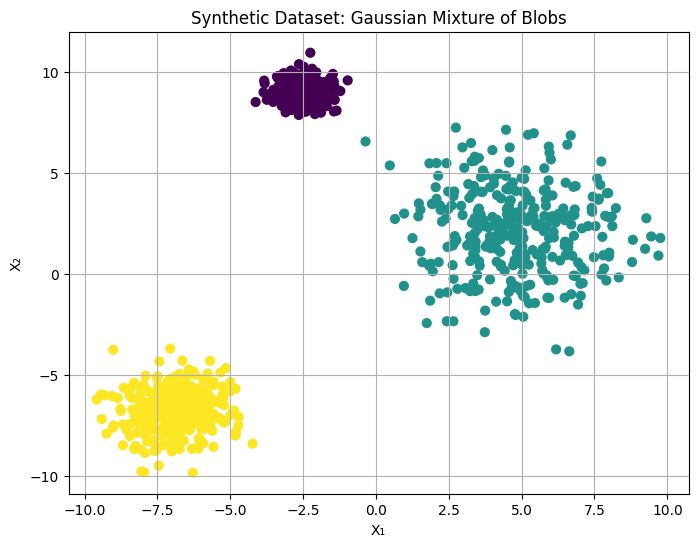

In [1]:
# This script generates a synthetic 2D dataset using a mixture of Gaussian distributions.
# It creates a set of data points grouped into clusters, where each cluster is sampled
# from a multivariate Gaussian (normal) distribution.
# We use sklearn's `make_blobs` to simulate three Gaussian-distributed clusters in 2D space,
# which can later be used to:
# - Visualize how a GMM fits multiple Gaussian components to the data
# - Compare GMM clustering with k-means
# - Explore probabilistic cluster assignments

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the Gaussian blobs
n_samples = 1000        # Total samples
n_features = 2          # Dimensionality
n_components = 3        # Number of Gaussian components

# Generate synthetic data
X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=[0.5, 2, 1],  # std devs for each blob
                       n_features=n_features)

# Visualize the blobs
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title("Synthetic Dataset: Gaussian Mixture of Blobs")
plt.xlabel("X₁")
plt.ylabel("X₂")
plt.grid(True)
plt.show()

In [10]:
# Import the GaussianMixture class for modeling from sklearn
from sklearn.mixture import GaussianMixture

# Suppress a specific warning from joblib about physical CPU cores
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# Create a Gaussian Mixture Model with 3 components and 10 initializations
# n_init=10 means the model will run 10 times with different initializations and pick the best
gm = GaussianMixture(n_components=3, n_init=10)

# Fit the model to the dataset X (which should be a 2D NumPy array of features)
gm.fit(X)

# Print the weights (mixing proportions) of each Gaussian component
print(f"The weights of the model are: {gm.weights_}")

# Print the estimated means (centroids) of each component
print(f"The means of the model are: {gm.means_}")

# Print the estimated covariance matrices of each component
# These describe the shape and orientation of the Gaussian ellipses
print(f"The covariances of the model are: {gm.covariances_}")

The weights of the model are: [0.333      0.33399802 0.33300198]
The means of the model are: [[-6.86656253 -6.78519427]
 [-2.51667581  9.0091172 ]
 [ 4.81735188  2.13801377]]
The covariances of the model are: [[[ 9.51883060e-01  6.31368496e-02]
  [ 6.31368496e-02  1.03517333e+00]]

 [[ 2.53915380e-01  1.42924368e-03]
  [ 1.42924368e-03  2.36515152e-01]]

 [[ 3.24150976e+00 -2.69967456e-01]
  [-2.69967456e-01  4.37416898e+00]]]


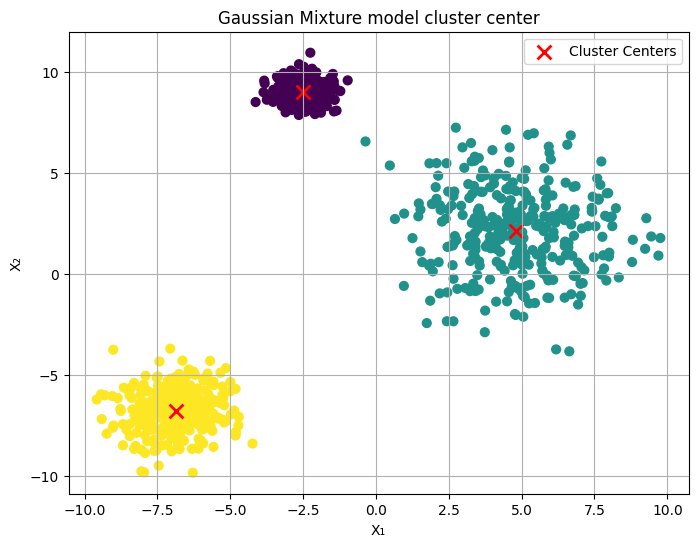

In [3]:
# Visualize the blobs and models determined centers
# As can be seen, the model has found the centers of each blob
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.scatter(gm.means_[:,0], gm.means_[:,1], marker='x', c='red', s=100, linewidth=2, label="Cluster Centers")
plt.title("Gaussian Mixture model cluster center")
plt.xlabel("X₁")
plt.ylabel("X₂")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# GMM uses an Expectation-Maxizimization (EM) algorith
# This algorithm is a generalization of the K-Means algorithm to find the blobs centers
# As the K-Means algorithm, it can converge to an incorrect solution
# That is the reason why n_init is set to 10 (by default it is 1)
# We can check if the algorithm actually converged by checking gm.converged_
print(f"Did the EM algorithm converged? --> {gm.converged_}")
print(f"How many iterations were required for the algorithm to converged? --> {gm.n_iter_}")

Did the EM algorithm converged? --> True
How many iterations were required for the algorithm to converged? --> 3


In [5]:
# We can carry out a hard clustering to assign each instance to a particular clster using the predict method
print(f"The predicted cluster for each instance is:\n{gm.predict(X)}")

The predicted cluster for each instance is:
[2 2 1 0 0 2 1 1 1 1 0 2 0 1 1 1 0 0 0 0 1 2 2 2 1 0 0 0 1 1 2 2 1 0 0 2 2
 1 2 2 0 1 0 2 0 2 0 0 2 1 2 0 1 2 0 2 0 0 0 1 1 0 2 2 0 0 2 1 1 0 2 0 1 1
 1 2 1 0 0 0 1 0 0 0 1 2 1 2 0 0 0 0 1 1 2 1 2 0 1 1 1 2 2 0 2 1 1 0 1 0 2
 1 1 1 0 1 2 2 1 0 0 1 2 1 2 2 1 2 1 1 0 1 1 2 0 2 0 1 1 1 0 0 2 2 2 0 1 0
 0 0 0 2 1 2 0 1 0 1 0 2 1 0 0 1 0 0 1 1 2 2 1 0 0 1 0 2 1 2 1 2 0 1 0 1 0
 2 0 2 0 2 1 0 1 1 0 2 1 1 1 2 0 1 0 0 1 0 1 0 0 1 1 2 2 1 1 0 2 0 2 1 2 2
 1 0 2 0 0 1 2 0 0 2 0 2 1 1 2 1 2 1 2 2 2 1 2 0 1 0 1 0 1 1 2 1 0 1 0 1 1
 1 1 0 2 1 2 2 1 0 0 2 1 0 1 1 0 2 0 2 2 1 2 1 2 1 1 0 0 1 0 2 2 0 1 1 2 0
 1 2 2 0 2 2 1 2 0 1 2 1 2 2 2 2 2 1 2 2 1 0 2 2 1 2 2 1 2 1 0 1 0 0 1 1 2
 2 2 0 2 1 2 1 2 1 1 1 0 0 2 2 0 0 0 0 0 1 0 0 1 0 0 2 1 1 1 1 2 1 2 2 2 1
 1 0 0 1 0 1 0 2 1 0 2 1 2 1 1 2 0 2 1 2 1 0 2 0 2 2 2 0 1 0 0 2 0 1 0 2 1
 0 0 2 1 0 2 2 2 1 2 0 2 1 0 0 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 1 2 0 2 2 2 1
 0 0 1 0 2 2 2 2 0 0 2 0 1 2 1 0 1 1 0 0 1 1 1 2 1 0 2 0

In [6]:
# We can also estimate the probability of each instance to belong to a particular cluster
# This is achieved by the predict_proba method
print(f"The of each probability to belong to each cluster is:\n{gm.predict_proba(X)}")

The of each probability to belong to each cluster is:
[[4.82782312e-253 3.31436723e-015 1.00000000e+000]
 [9.00243603e-234 7.57744068e-014 1.00000000e+000]
 [4.08528901e-102 1.00000000e+000 3.63929786e-050]
 ...
 [1.17075461e-024 1.00000000e+000 1.91478208e-057]
 [2.09778904e-080 1.00000000e+000 1.24115628e-036]
 [6.71388666e-258 1.59620749e-016 1.00000000e+000]]


In [7]:
# Since a Gaussian Mixture model is a generative model, we can sample new instances
X_new, y_new = gm.sample(6)
print(f"The new instances are:\n{X_new}")
print(f"The new instances labels are:\n{y_new}")

The new instances are:
[[-3.11304109  9.33767031]
 [-2.17386919  9.77195643]
 [ 7.66374464  0.12277979]
 [ 4.7160219  -0.2583383 ]
 [-7.79011352 -5.5373002 ]
 [-6.44849673 -5.28515764]]
The new instances labels are:
[0 0 1 1 2 2]


In [8]:
# We can estimate the density of the model at any given location
# For each instance the score_sample method estimates the log the probability density function (PDF) at the location
# The greater the score, the higher the density
print(F"The score for each instance is:\n{gm.score_samples(X)}")

The score for each instance is:
[ -3.03346683  -3.2190725   -4.39733334  -1.99572927  -2.73332156
  -2.94324709  -4.45346056  -4.73433155  -5.04040019  -5.33043347
  -1.67548232  -4.83894818  -1.73543568  -5.83830093  -4.97846285
  -5.05153429  -1.86876311  -1.70384879  -2.0214995   -1.60923314
  -4.27938751  -3.01845786  -3.2240066   -5.47493307  -4.79685379
  -2.17501955  -1.78658704  -1.95089685  -5.06327811  -4.59098695
  -3.57524042  -5.10306686  -4.51092321  -1.71907936  -2.24496523
  -4.01754062  -3.25096321  -5.91626298  -3.81100195  -4.16718016
  -4.25597818  -4.78002107  -1.7312446   -3.10129413  -3.90911955
  -8.08841538  -1.84551552  -1.84080758  -4.81117218  -5.69452913
  -3.64805421  -1.99159923  -5.74481162  -3.31690719  -2.4491945
 -10.27409724  -2.19505105  -1.91570749  -2.23275644  -5.90942234
  -4.56949751  -2.13094844  -3.43897438  -3.14674027  -1.77570057
  -4.03388633  -3.46242791  -5.4208244   -6.30618329  -1.80520983
  -3.28013122  -1.83497425  -4.6928261   -4.2

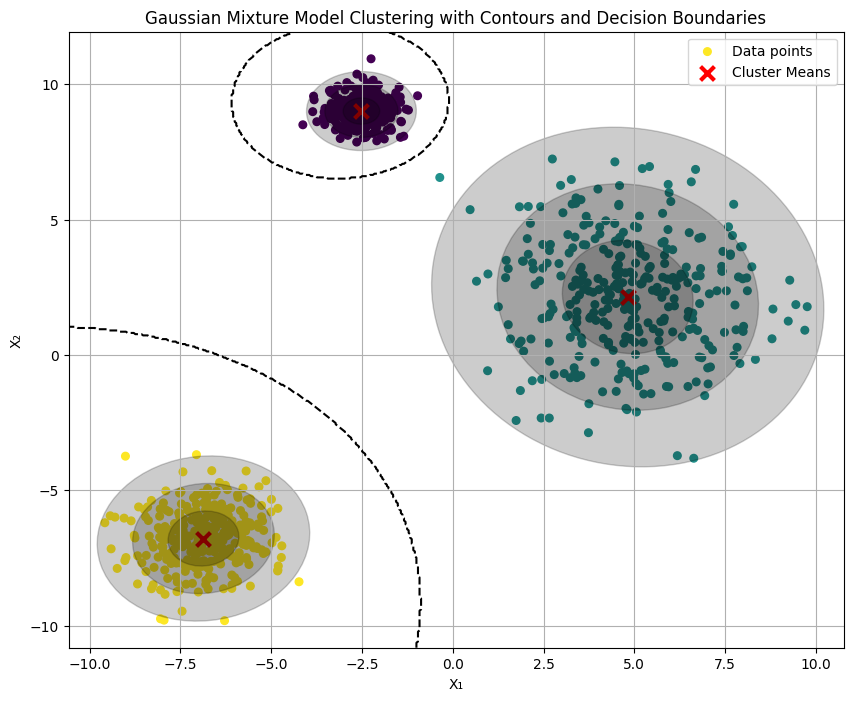

In [9]:
from matplotlib.patches import Ellipse

# Create a meshgrid for decision boundaries
x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

# Predict cluster labels for each point in the grid
Z = gm.predict(grid_points)
Z = Z.reshape(X_grid.shape)

# Plot
plt.figure(figsize=(10, 8))

# Plot decision boundaries (using predicted labels from the grid)
plt.contour(X_grid, Y_grid, Z, levels=np.unique(Z), colors='k', linestyles='dashed', linewidths=1.5)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, cmap='viridis', label='Data points')

# Plot the cluster means
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', s=100, linewidths=3, label='Cluster Means')

# Draw the ellipses for the Gaussian components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance matrix."""
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):  # Full covariance matrix
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:  # Diagonal covariance case
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):  # Draw 1σ, 2σ, 3σ ellipses
        ell = Ellipse(xy=position, width=nsig * width, height=nsig * height,
                      angle=angle, alpha=0.2, **kwargs)
        ax.add_patch(ell)

# Draw ellipses for each component
for mean, covar in zip(gm.means_, gm.covariances_):
    draw_ellipse(mean, covar, color='k')

plt.title("Gaussian Mixture Model Clustering with Contours and Decision Boundaries")
plt.xlabel("X₁")
plt.ylabel("X₂")
plt.legend()
plt.grid(True)
plt.show()